In [1]:
import os
import re
import sys
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import skimage
import squidpy as sq
from skimage import io
from tqdm.notebook import tqdm, trange

sc.settings.verbosity = 3

import matplotlib
from matplotlib import cm, colors
from matplotlib.pyplot import rc_context

sc.set_figure_params(format="png")
import anndata as ad
import seaborn as sns
from kneed import KneeLocator
from matplotlib.ticker import MaxNLocator
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

In [2]:
p_dir = (Path().cwd().parents[0]).absolute()
data_dir = p_dir / "data"

In [3]:
%load_ext autoreload
%autoreload 2

module_path = str(p_dir / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

import utils as my_utils

In [4]:
donor = f"combined_LN"
all_donor = [
    "LN Donor A",
    "LN Donor E",
    "TS Donor A",
    "TS Donor E",
]



# Import data

In [5]:
def get_masks_cp(mask_folder):
    """
    Function to get all mask from mask forlder
    """
    # Read masks
    masks = {}

    for (dirpath, dirnames, filenames) in os.walk(mask_folder):
        for name in sorted(filenames):
            if "tif" in name:
                filename = os.path.join(dirpath, name)
                img = skimage.io.imread(filename)
                condition = name.split("_")[2].split("Donor")[0]
                masks[condition] = img[:1000, :1000]
            else:
                continue
    return masks

In [6]:
adata_path = data_dir / "metadata" / f"{donor}.h5ad"

In [7]:
adata = sc.read_h5ad(adata_path)

In [8]:
if "combined" in donor:
    masks = {}
    for d in all_donor:
        masks[d] = get_masks_cp(data_dir / "masks_cp" / d)
else:
    masks = get_masks_cp(data_dir / "masks_cp" / donor)

In [9]:
adata = adata[adata.obs['Dataset'].isin(all_donor)]

In [21]:
for marker in adata.var_names:
    intensities = adata[:,marker].X.flatten()

In [24]:
intensities = np.arcsinh(intensities)

C:\Users\thu71\Anaconda3\envs\new_codex\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

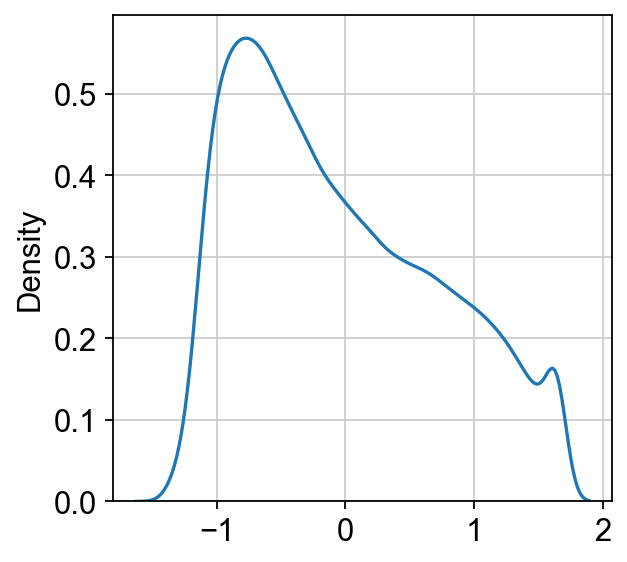

In [25]:
sns.kdeplot(intensities, bw=0.1)